In [55]:
import os
import shutil

import nibabel as nib
import numpy as np

import matplotlib.pyplot as plt

from generate_nerf_data_utils import read_ts_csv, ts_to_poses, normalize, create_ultranerf_package

In [56]:
leg_data_main_path = "data/leg_data"
if os.path.exists(leg_data_main_path):
    shutil.rmtree(leg_data_main_path)
os.makedirs(leg_data_main_path)

In [57]:
main_nii_path = "data/LAB_AL_G.nii"
main_nii = nib.load(main_nii_path).get_fdata()

print("main_nii.shape", main_nii.shape)

main_nii.shape (221, 537, 1714)


In [58]:
ts = read_ts_csv("corrected_leg_ts.csv")

In [59]:
print("ts.shape", ts.shape)

ts.shape (1694, 16)


In [60]:
# Remove the last 20 frames from main_nii
main_nii = main_nii[:, :, :-20]

In [61]:
print("main_nii.shape", main_nii.shape)

main_nii.shape (221, 537, 1694)


In [62]:
# Correct dimensions
main_nii = np.transpose(main_nii, (2, 0, 1))
main_nii = np.transpose(main_nii, (0, 2, 1))
print("main_nii.shape", main_nii.shape)

main_nii.shape (1694, 537, 221)


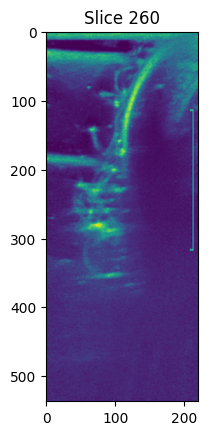

In [63]:
# Visualize a random slice

slice = 260#np.random.randint(0, main_nii.shape[0])

plt.imshow(main_nii[slice, :, :])
plt.title("Slice {}".format(slice))
plt.show()

In [64]:
print(f"Unique values for the image: {np.unique(main_nii)}")

Unique values for the image: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 19

In [71]:
def generate_train_val_test_indices(num_samples):
    # For each 20 frames, first 18 are train, next 1 is val, next 1 is test
    train_indices = []
    val_indices = []
    test_indices = []

    for i in range(0, num_samples // 20):
        train_indices += list(range(i * 20, i * 20 + 18))
        val_indices += list(range(i * 20 + 18, i * 20 + 19))
        test_indices += list(range(i * 20 + 19, i * 20 + 20))

    # Add the remaining frames to train
    train_indices += list(range(num_samples // 20 * 20, num_samples))

    # Convert to numpy arrays
    train_indices = np.array(train_indices)
    val_indices = np.array(val_indices)
    test_indices = np.array(test_indices)

    return train_indices, val_indices, test_indices

In [72]:
train_indices, val_indices, test_indices = generate_train_val_test_indices(main_nii.shape[0])

In [74]:
train_nii = main_nii[train_indices, :, :]
val_nii = main_nii[val_indices, :, :]
test_nii = main_nii[test_indices, :, :]

train_ts = ts[train_indices, :]
val_ts = ts[val_indices, :]
test_ts = ts[test_indices, :]

In [75]:
print("train_nii.shape", train_nii.shape)
print("val_nii.shape", val_nii.shape)
print("test_nii.shape", test_nii.shape)

print("train_ts.shape", train_ts.shape)
print("val_ts.shape", val_ts.shape)
print("test_ts.shape", test_ts.shape)

train_nii.shape (1526, 537, 221)
val_nii.shape (84, 537, 221)
test_nii.shape (84, 537, 221)
train_ts.shape (1526, 16)
val_ts.shape (84, 16)
test_ts.shape (84, 16)


In [77]:
create_ultranerf_package(os.path.join(leg_data_main_path, "train"), train_nii, train_ts)
create_ultranerf_package(os.path.join(leg_data_main_path, "val"), val_nii, val_ts)
create_ultranerf_package(os.path.join(leg_data_main_path, "test"), test_nii, test_ts)